100%|██████████| 170M/170M [00:03<00:00, 44.2MB/s]


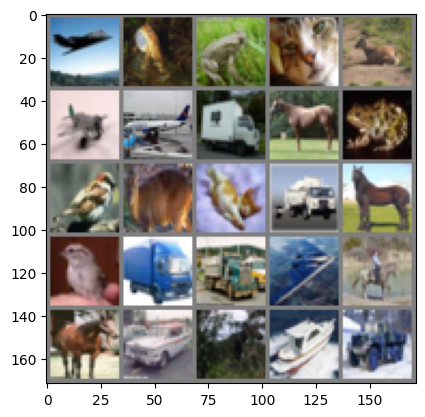

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_epochs = 100
batch_size = 32
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
test_data = torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_data,batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size,shuffle=False)

classes = ("plane","car","bird","deer","dog","frog","horse","ship","truck")

def imshow(imgs):
  imgs = imgs/2 + 0.5
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs,(1,2,0)))
  plt.show()

dataiter = iter(train_loader)
images,labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25],nrow=5)

imshow(img_grid)







In [2]:
class ConvNet(nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(3,32,3,padding="same"),
        nn.BatchNorm2d(32),
        nn.ReLU(),


        nn.Conv2d(32,32,3,padding="same"),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(0.2),


        nn.Conv2d(32,64,3,padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(64,64,3,padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(0.3),

        nn.Conv2d(64,128,3,padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),


        nn.Conv2d(128,128,3,padding="same"),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(0.35)
        )


    self.fc_layer = nn.Sequential(
        nn.Linear(2048,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512,10)
        )


  def forward(self,x):
    x = self.conv_layer(x)
    x = torch.flatten(x,1)
    x = self.fc_layer(x)
    x = F.softmax(x,dim=1)
    return x



model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-4)


n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  running_loss = 0.0

  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    loss.backward()
    optim.step()
    optim.zero_grad()

    running_loss += loss.item()


  print(f"[{epoch+1}] loss: {running_loss/n_total_steps:.3f}")


print("Finished Trainnig")
PATH = "./cnn_eg,pth"
torch.save(model.state_dict(),PATH)




[1] loss: 2.017
[2] loss: 1.893
[3] loss: 1.837
[4] loss: 1.812
[5] loss: 1.790
[6] loss: 1.775
[7] loss: 1.765
[8] loss: 1.754
[9] loss: 1.746
[10] loss: 1.740
[11] loss: 1.731
[12] loss: 1.725
[13] loss: 1.717
[14] loss: 1.716
[15] loss: 1.713
[16] loss: 1.706
[17] loss: 1.704
[18] loss: 1.699
[19] loss: 1.697
[20] loss: 1.695
[21] loss: 1.692
[22] loss: 1.690
[23] loss: 1.689
[24] loss: 1.687
[25] loss: 1.686
[26] loss: 1.684
[27] loss: 1.678
[28] loss: 1.680
[29] loss: 1.678
[30] loss: 1.676
[31] loss: 1.677
[32] loss: 1.674
[33] loss: 1.674
[34] loss: 1.672
[35] loss: 1.672
[36] loss: 1.672
[37] loss: 1.670
[38] loss: 1.670
[39] loss: 1.668
[40] loss: 1.666
[41] loss: 1.668
[42] loss: 1.667
[43] loss: 1.666
[44] loss: 1.664
[45] loss: 1.662
[46] loss: 1.665
[47] loss: 1.665
[48] loss: 1.664
[49] loss: 1.660
[50] loss: 1.663
[51] loss: 1.661
[52] loss: 1.662
[53] loss: 1.661
[54] loss: 1.659
[55] loss: 1.659
[56] loss: 1.658
[57] loss: 1.660
[58] loss: 1.658
[59] loss: 1.659
[60] l

In [3]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval()


with torch.no_grad():
  n_correct = 0
  n_correct2 = 0
  n_samples = len(test_loader.dataset)

  for images,labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = loaded_model(images)

    _, predicted = torch.max(outputs,1)
    n_correct += (predicted == labels).sum().item()

    output2 = loaded_model(images)
    _, predicted2 = torch.max(output2,1)
    n_correct2 += (predicted2 == labels).sum().item()


  accuracy = (100.0*n_correct)/n_samples
  print(f"Accuracy of the model: {accuracy}%")

  accuracy = (100.0*n_correct2)/n_samples
  print(f"Accuracy of the model: {accuracy}%")



Accuracy of the model: 83.01%
Accuracy of the model: 83.01%
